## Import packages and load data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
cancer = load_breast_cancer()

In [3]:
X = cancer['data']
y = cancer['target']

In [4]:
X.shape

(569, 30)

In [24]:
#number of target = 1 samples
np.mean(y)

0.6274165202108963

## Train Test Data Split (70/30)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=101)

## Default parameters

In [26]:
dtc = DecisionTreeClassifier(random_state=0)

In [27]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [28]:
#Note the 100% training accuracy which is a sign of overfitting
print('Training Score: {:.2f}'.format(dtc.score(X_train, y_train)))
print('Test Score: {:.2f}'.format(dtc.score(X_test, y_test)))

Training Score: 1.00
Test Score: 0.91


In [29]:
pred = dtc.predict(X_test)

In [30]:
#15 wrong predictions out of 171 test samples
print(confusion_matrix(y_test, pred))

[[58  6]
 [ 9 98]]


In [31]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89        64
           1       0.94      0.92      0.93       107

    accuracy                           0.91       171
   macro avg       0.90      0.91      0.91       171
weighted avg       0.91      0.91      0.91       171



## Build a less complex model to avoid overfitting

In [46]:
dtc = DecisionTreeClassifier(max_depth=4, random_state=0)

In [47]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [48]:
#Note the 100% training accuracy which is a sign of overfitting
print('Training Score: {:.2f}'.format(dtc.score(X_train, y_train)))
print('Test Score: {:.2f}'.format(dtc.score(X_test, y_test)))

Training Score: 0.98
Test Score: 0.92


In [49]:
pred = dtc.predict(X_test)

In [50]:
#14 wrong predictions out of 171 test samples
print(confusion_matrix(y_test, pred))

[[ 57   7]
 [  7 100]]


## Feature Importances

In [51]:
print('Feature Importances:')
print(dtc.feature_importances_)

Feature Importances:
[0.         0.00871056 0.         0.         0.         0.
 0.01134259 0.         0.01990985 0.         0.02216168 0.
 0.         0.02379943 0.         0.         0.04233873 0.
 0.         0.         0.         0.         0.         0.10281228
 0.         0.         0.         0.76892488 0.         0.        ]


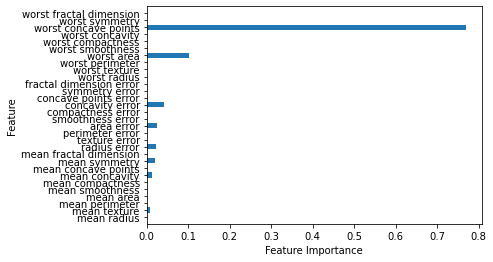

In [58]:
n_features = cancer.data.shape[1]
plt.barh(np.arange(n_features), dtc.feature_importances_, align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.ylim(-1, n_features);